# Examen Parcial n°1 2da Parte - TLP3 - Python para Ciencia de Datos.


**A partir del datasets brindado, realizar los siguientes procedimientos:**

* Importar datasets con Pandas.
* Explorar los datos con los metodos correspondientes. 
* Limpieza de los datos (Normalización de datos).
* Obtener estadisticas.
* Mostrar los datos procesados con graficos utilizando la libreria Matplotlib.
* Exportar el contenido a un archivo sqlite utilizando PANDAS.


**Importante: Se debe documentar cada procedimiento realizado, siguiendo la siguiente estructura:**

1. Celda de Markdown (Documentación)
2. Código (Sin comentarios, se debe documentar lo sufiente solo en la celda de markdown).


### Criterios de Evaluación:

1. No esta permitido el uso de IAs durante el examen. (Desactivar Copilot o cualquier herramienta de IA para autocompletar codigo.)

2. Se deben utilizar nombres de variables descriptivos y claros (Utilizar la nomeclatura correspondiente para los nombres de variables).

3. Comentarios claros y concisos que expliquen el propósito de cada sección del código en una celda de markdown antes del código.

4. Utilizar mensajes de commit descriptivos. (Puedes utilizar la extension CONVENTIONAL COMMIT de VS-CODE).

5. Entrega en tiempo y forma (Parciales entregados fuera de hora o con commits pasados el horario de entrega quedará invalidado.)

6. Todo el código desarrollado debe ser subido a un repositorio en GitHub (el nombre del repositorio de seguir la siguiente estructura: 
**parcial1_tlp3_nombre_apellido**).

7. Para resolver las actividades se debe insertar casillas de codigo entre cada actividad del cuaderno de Jupyter.

8. Deben trabajar con el datasets adjunto.

9. Una vez finalizado el examen, los resultados deben quedar guardados debajo de cada celda (NO EJECUTAR LA OPCIÓN "borrar todas las salidas").

**Importante:** Una vez finalizado el examen, marcar como completado en el classroom.

## Actividades: 
### 1. Importación del Dataset con Pandas

En esta sección, se debe utilizar la librería Pandas para cargar el archivo CSV que contiene los datos de CALIFICACIONES en un DataFrame.

### 2. Exploración Inicial de los Datos

A continuación, se deben emplear métodos de Pandas para obtener una visión general del dataset. 
- 2.1: Visualizar las primeras filas y ultimas.
- 2.2: Obtener informacion del df con su metodo correspondiente.
- 2.3: Hacer un conteo de valores nulos.

### 3. Limpieza y Normalización de los Datos

- 3.1. Esta etapa crucial deben aplicar la corrección de diversos errores presentes en el dataset. Se abordarán los valores faltantes (Deben aplicar los metodos que ustedes crean convenientes **(Solo 1)**, por ejemplo: Eliminación de filas, cubrir valores con media, mediana, etc.)
- 3.2: La columna Fecha deberan pasarla al tipo datetime con su metodo correspondiente.
- 3.3: Corregir las mayusculas en el caso de Nombre y Apellido (Si es que corresponde.)


### 4. Obtención de Estadísticas Descriptivas

Después de la limpieza, deben hacer lo siguiente: 

- 4.1: calcular nuevamente las estadísticas descriptivas para observar el impacto del proceso de limpieza en los datos numéricos.
- 4.2: Calcular estadísticas específicas por grupo (Agrupar dos columnas).

### 5. Visualización de los Datos con Matplotlib

En esta sección, deben utilizar la librería Matplotlib para crear **UNA** visualización que permitan comprender mejor los datos de ventas.El grafico es a elección, puede crear **UNO** de los siguientes: histogramas, diagramas de dispersión, gráficos de barras y graficos de torta.

### 6. Exportación a Archivo SQLite

Finalmente, deben utilizar la funcionalidad de Pandas para guardar el DataFrame procesado en una base de datos SQLite. Deben hacer una conexión y hacer una consulta para ver si los datos fueron cargados correctamente.



# Importaciones

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

### 1. Importación del Dataset con Pandas

En la siguiente celda se utiliza la funcion "read_csv" para cargar el csv en un DataFrame

In [2]:
df = pd.read_csv("calificaciones.csv")

### 2. Exploración Inicial de los Datos

En las siguientes celdas:
- Se utilizan las funciones de "head" y "tail" de pandas par ver las primeras y ultimas filas del DataFrame
- Se utilza la funcion ".info" para obtener informacion del DataFrame
- Se utiliza la funcion ".isnull" junto con ".sum" para contar la cantidad de valores nulos en cada columna

In [3]:
df.head()

,nombre,apellido,parcial1,parcial2,nota_final,fecha,aprobado
0,federico,torres,NaN,6.9,6.1,2024-03-23,sí
1,federico,ramirez,8.7,6.6,NaN,2024-04-04,Aprobado
2,federico,fernandez,NaN,NaN,7.1,2024-10-27,NO
3,maría,torres,5.5,8.8,2.0,2024-06-14,NO
4,agustina,fernandez,6.8,7.3,4.0,2024-08-21,Si


In [4]:
df.tail()

,nombre,apellido,parcial1,parcial2,nota_final,fecha,aprobado
96,martín,gomez,4.1,8.7,NaN,2024-07-02,sí
97,andrés,gomez,1.2,NaN,3.9,2024-11-04,aprobado
98,federico,rodriguez,9.1,8.6,NaN,2024-05-11,Si
99,federico,pereyra,NaN,1.7,2.2,2024-05-20,Reprobado
100,federico,ruiz,3.5,7.1,8.6,2024-03-07,sí


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   nombre      101 non-null    object 
 1   apellido    101 non-null    object 
 2   parcial1    82 non-null     float64
 3   parcial2    68 non-null     float64
 4   nota_final  63 non-null     float64
 5   fecha       101 non-null    object 
 6   aprobado    101 non-null    object 
dtypes: float64(3), object(4)
memory usage: 5.7+ KB


In [6]:
df.isnull().sum()

nombre         0
apellido       0
parcial1      19
parcial2      33
nota_final    38
fecha          0
aprobado       0
dtype: int64

### 3. Limpieza y Normalización de los Datos

En la siguiente celda se utilizan loops para:
- Capitalizar las columans de "nombre", "apellido" y "aprobado"
- Rellenar los valores NaN con la mediana

Se convierte la columna "fecha" a tipo datetime

Se utiliza la funcion "replace" para reemplazar todos los "si" y "no" en "Aprobaodo" o "Reprobado"

In [7]:
for col in ["nombre", "apellido", "aprobado"]:
    df[col] = df[col].str.capitalize()

for col in ["parcial1","parcial2", "nota_final"]:
    df[col] = df[col].fillna(df[col].median())

df["fecha"] =  pd.to_datetime(df["fecha"])

df["aprobado"] = df["aprobado"].replace("Si", "Aprobado")
df["aprobado"] = df["aprobado"].replace("Sí", "Aprobado")
df["aprobado"] = df["aprobado"].replace("No", "Reprobado")

### 4. Obtención de Estadísticas Descriptivas
En las siguientes celdas se utilizan las mismas funciones que en el punto 2 para observar el impacto del proceso de limpieza en los datos numéricos
. También se utiliza el groupby para agrupar las columnas de nombre y apellido para calcular las estadísticas de la nota final 

In [8]:
df.head()

,nombre,apellido,parcial1,parcial2,nota_final,fecha,aprobado
0,Federico,Torres,5.05,6.9,6.1,2024-03-23,Aprobado
1,Federico,Ramirez,8.70,6.6,6.1,2024-04-04,Aprobado
2,Federico,Fernandez,5.05,5.5,7.1,2024-10-27,Reprobado
3,María,Torres,5.50,8.8,2.0,2024-06-14,Reprobado
4,Agustina,Fernandez,6.80,7.3,4.0,2024-08-21,Aprobado


In [9]:
df.tail()

,nombre,apellido,parcial1,parcial2,nota_final,fecha,aprobado
96,Martín,Gomez,4.10,8.7,6.1,2024-07-02,Aprobado
97,Andrés,Gomez,1.20,5.5,3.9,2024-11-04,Aprobado
98,Federico,Rodriguez,9.10,8.6,6.1,2024-05-11,Aprobado
99,Federico,Pereyra,5.05,1.7,2.2,2024-05-20,Reprobado
100,Federico,Ruiz,3.50,7.1,8.6,2024-03-07,Aprobado


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   nombre      101 non-null    object        
 1   apellido    101 non-null    object        
 2   parcial1    101 non-null    float64       
 3   parcial2    101 non-null    float64       
 4   nota_final  101 non-null    float64       
 5   fecha       101 non-null    datetime64[ns]
 6   aprobado    101 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 5.7+ KB


In [11]:
df.isnull().sum()

nombre        0
apellido      0
parcial1      0
parcial2      0
nota_final    0
fecha         0
aprobado      0
dtype: int64

In [12]:
df.groupby(["nombre", "apellido"])["nota_final"].describe()

count      mean       std  min    25%   50%    75%  max
nombre    apellido                                                          
Agustina  Fernandez    2.0  5.050000  1.484924  4.0  4.525  5.05  5.575  6.1
          Lopez        1.0  9.400000       NaN  9.4  9.400  9.40  9.400  9.4
          Pereyra      1.0  9.800000       NaN  9.8  9.800  9.80  9.800  9.8
          Rodriguez    1.0  6.100000       NaN  6.1  6.100  6.10  6.100  6.1
          Ruiz         2.0  6.100000  0.000000  6.1  6.100  6.10  6.100  6.1
...                    ...       ...       ...  ...    ...   ...    ...  ...
Valentina Fernandez    2.0  6.200000  0.282843  6.0  6.100  6.20  6.300  6.4
          Lopez        2.0  3.000000  2.687006  1.1  2.050  3.00  3.950  4.9
          Pereyra      3.0  4.266667  1.650253  2.9  3.350  3.80  4.950  6.1
          Sanchez      1.0  6.100000       NaN  6.1  6.100  6.10  6.100  6.1
          Torres       1.0  6.100000       NaN  6.1  6.100  6.10  6.100  6.1

[68 rows x 8 columns]

### 5. Visualización de los Datos con Matplotlib
Se utiliza un histograma para mostrar la distribucion de la nota final por alumno

<function matplotlib.pyplot.show(close=None, block=None)>

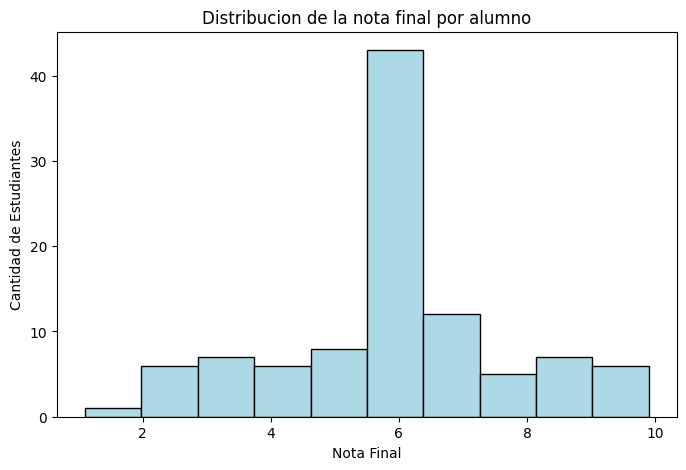

In [13]:
plt.figure(figsize=(8,5))
plt.hist(df["nota_final"], bins=10, color="lightblue", edgecolor= "black")
plt.title("Distribucion de la nota final por alumno")
plt.xlabel("Nota Final")
plt.ylabel("Cantidad de Estudiantes")
plt.tight_layout
plt.show

### 6. Exportación a Archivo SQLite

En la suiguente celda se utiliza sqlite3 para convertir el dataframe a un archivo sqlite

In [14]:
conn = sqlite3.connect("calificaciones.sqlite")
df.to_sql("Calificaiones", conn, if_exists="replace", index=False)
conn.close()